Selecting alternatives that would be suitable for a good clustering

In [89]:
from matplotlib import pyplot as plt
from utils import *
import promethee_functions as pf

# 1. Reading Data

In [90]:
data = read_data()
# le = life expectancy -> maximum is better
# gdi = gender development index -> maximum is better
# hdi = human development index -> maximum is better
# eys = expected years of schooling -> maximum is better
# poptotal = total population -> maximum is better
# co2prod = production of co2 -> minimum is better
# Pass through the score functions
column = data["co2prod"]
score = pf.score_function(column, maximize=False)

data["co2prod"] = score
data.shape

(75, 7)

In [91]:
L = data.iloc[0]["co2prod"].shape[0] # Length of the time series
N = data.shape[0] # Number of time series
K = data.columns.shape[0] -1 # Number of features/criteria

W = [1/K for _ in range(K)]
P = [0.90 for _ in range(K)]
Q = [0.1 for _ in range(K)]
criterias = data.columns[1:]
alternatives = data["iso3"].values

In [92]:
phi_c_all = pf.get_all_Phi_c(data, P, Q)

c:\Users\raphu\Documents\ULB\MA2\ulb-master-thesis\code\src\promethee_functions.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  d = a_i[c] - a_j[c]


In [93]:
PHI = pf.PHI_all(phi_c_all, W, N, L, K)

# 2. Selecting rows for easy clustering

In [94]:
# Create a dataframe with PHI and the iso3 code
phi_df = pd.DataFrame(PHI)

phi_df["iso3"] = alternatives
# Set as index the iso3 code
phi_df.set_index("iso3", inplace=True)
phi_df

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
iso3,,,,,,,,,,,,,,,,,,,,,
ALB,0.105964,0.117994,0.098851,0.070508,0.062081,0.050774,0.054130,0.052002,0.067897,0.052637,...,0.158202,0.159934,0.152528,0.130402,0.106703,0.091176,0.088901,0.033454,0.026314,0.011738
ARG,0.177020,0.173106,0.156219,0.138965,0.135020,0.126637,0.123887,0.114286,0.109132,0.141716,...,0.171220,0.173131,0.164203,0.163001,0.167278,0.166169,0.167215,0.153010,0.148475,0.147437
AUS,0.329812,0.338742,0.324162,0.332316,0.315188,0.318437,0.306743,0.301295,0.296045,0.292123,...,0.260710,0.257760,0.255621,0.258004,0.256617,0.268104,0.255924,0.286888,0.288922,0.261296
AUT,0.278599,0.253827,0.270261,0.262785,0.256756,0.255176,0.252504,0.249946,0.244302,0.245510,...,0.149554,0.160968,0.143930,0.143388,0.129248,0.143812,0.130486,0.137764,0.136727,0.142258
BHS,0.034055,0.015041,0.053466,0.064809,0.061170,0.049885,0.040818,0.050853,0.030755,0.022264,...,-0.084917,-0.092709,-0.109122,-0.104639,-0.119306,-0.110021,-0.164680,-0.130879,-0.115580,-0.092079
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
URY,0.201172,0.189943,0.160887,0.160195,0.154740,0.142395,0.127369,0.137022,0.137535,0.129261,...,0.071282,0.076500,0.068925,0.083582,0.095397,0.083180,0.081578,0.104469,0.080566,0.107808
ZMB,-0.303693,-0.300695,-0.298596,-0.300828,-0.303912,-0.303007,-0.305170,-0.310410,-0.312789,-0.312442,...,-0.293706,-0.294090,-0.294313,-0.295891,-0.294809,-0.293310,-0.296037,-0.301547,-0.303676,-0.303887
ZZA.VHHD,0.113179,0.118802,0.111349,0.097997,0.097842,0.088970,0.090453,0.084346,0.074526,0.063967,...,0.049621,0.051844,0.058151,0.059102,0.057232,0.057945,0.053851,0.049424,0.047806,0.047188


In [95]:
# Split the data into groups of 10
phi_df = phi_df.sort_values(by=0, ascending=False)
phi_df = phi_df.reset_index(drop=True)

phi_df["group"] = phi_df.index // 10

phi_df

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,group
0,0.367262,0.356570,0.350880,0.356757,0.346322,0.338212,0.337003,0.331838,0.327302,0.324650,...,0.383229,0.380729,0.386444,0.389489,0.397112,0.399804,0.388969,0.403423,0.403590,0
1,0.359162,0.384043,0.388292,0.364844,0.366343,0.336607,0.340699,0.353279,0.363970,0.340502,...,0.328196,0.316762,0.293413,0.296652,0.293358,0.264038,0.282258,0.294431,0.277508,0
2,0.347294,0.345961,0.339725,0.344298,0.343032,0.339105,0.339885,0.338187,0.328064,0.315506,...,0.177805,0.183552,0.174981,0.168206,0.170914,0.163098,0.162113,0.160993,0.162982,0
3,0.343349,0.360352,0.356096,0.347082,0.365901,0.348059,0.345526,0.340154,0.349284,0.342946,...,0.279955,0.284917,0.285023,0.292429,0.292730,0.294467,0.304965,0.311864,0.301845,0
4,0.339130,0.335393,0.317108,0.296605,0.345243,0.324248,0.317204,0.305473,0.282068,0.269185,...,0.223842,0.210151,0.193835,0.202152,0.199175,0.202850,0.215339,0.217421,0.220802,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,-0.352944,-0.353158,-0.353480,-0.353949,-0.353833,-0.341122,-0.339760,-0.337888,-0.331550,-0.327532,...,-0.247903,-0.239067,-0.228258,-0.214260,-0.201202,-0.191700,-0.182094,-0.162912,-0.138206,7
71,-0.356993,-0.346445,-0.346674,-0.339390,-0.333935,-0.331775,-0.322295,-0.321531,-0.314079,-0.316926,...,-0.255985,-0.259537,-0.260283,-0.265337,-0.266576,-0.259670,-0.262963,-0.254095,-0.247333,7
72,-0.403077,-0.392019,-0.394960,-0.397577,-0.399323,-0.407010,-0.404707,-0.405061,-0.454775,-0.399893,...,-0.367629,-0.369639,-0.381255,-0.384923,-0.380376,-0.372493,-0.365305,-0.363894,-0.365265,7
73,-0.409239,-0.409744,-0.413984,-0.418098,-0.414542,-0.415335,-0.416564,-0.413000,-0.408516,-0.411479,...,-0.362923,-0.366618,-0.369484,-0.378976,-0.382973,-0.385019,-0.385796,-0.378804,-0.381217,7


KeyError: 'iso3'

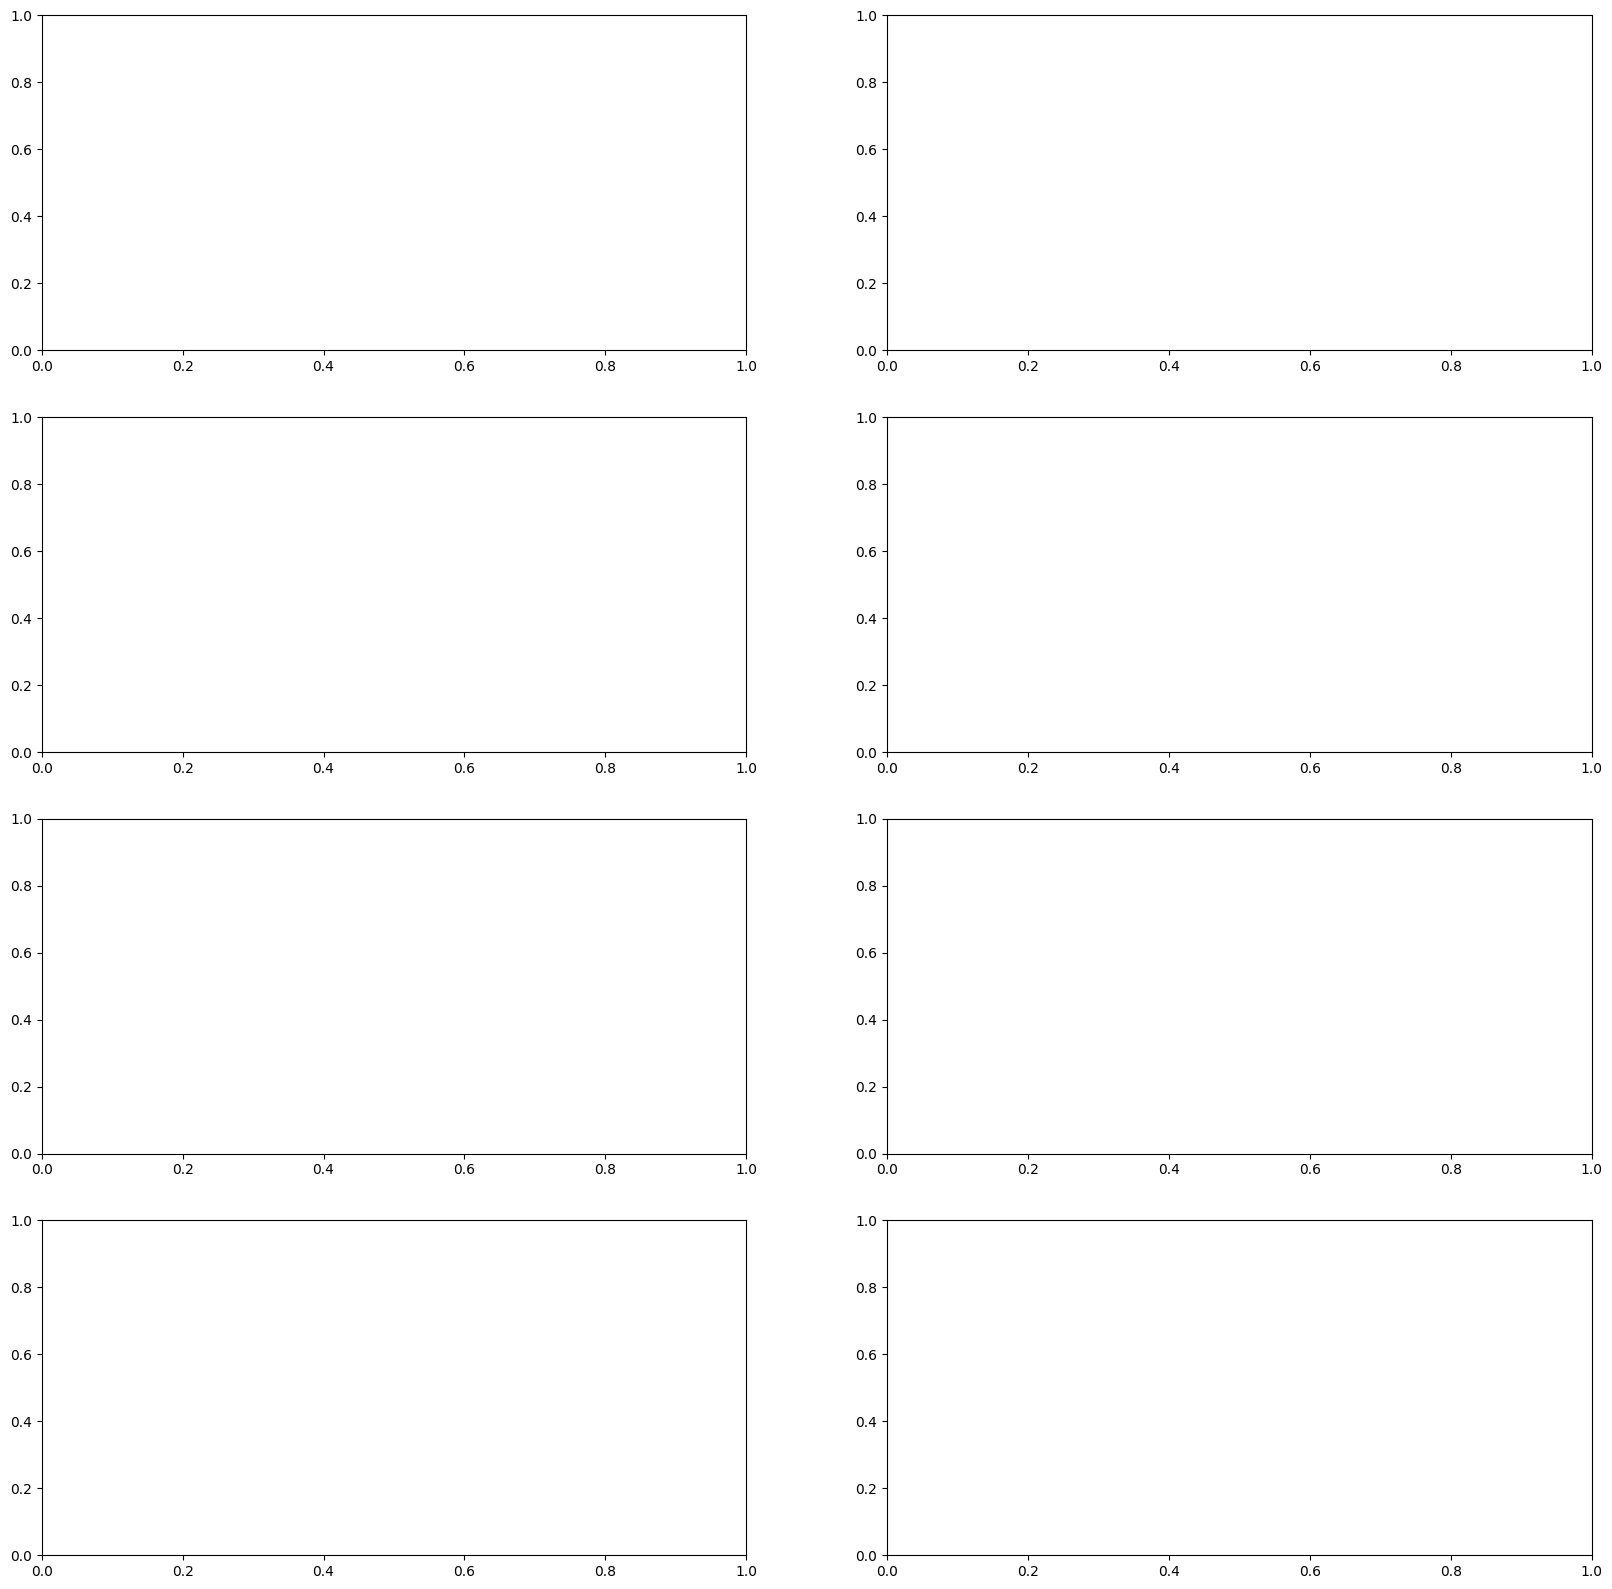

In [96]:
# plot each group on a different subplot
fig, axs = plt.subplots(4, 2, figsize=(20, 20))
for i in range(4):
    for j in range(2):
        group = phi_df[phi_df["group"] == i*2 + j]
        group = group.drop(columns=["group"])
        names = group["iso3"]
        group = group.drop(columns=["iso3"])
        axs[i, j].set_ylim(-0.5, 0.5)
        axs[i, j].plot(group.T)
        axs[i, j].set_title(f'Group {i*2 + j}')
        axs[i, j].legend(names)
plt.show()


In [44]:
group0 = ["PAK", "SDN", "BDI", "HTI"]
group1 = ["EST", "CZE", "MLT", "SGP", "IRL"]
group2 = ["CHE", "ISL", "NZL", "SWE"]

# Plot the PHI values for the countries in the groups

group0_phi = phi_df[phi_df["iso3"].isin(group0)]
group1_phi = phi_df[phi_df["iso3"].isin(group1)]
group2_phi = phi_df[phi_df["iso3"].isin(group2)]

plot = False

if plot:
    # plot each group on a different subplot
    fig, axs = plt.subplots(3, 1, figsize=(10, 5))
    for i in range(3):
        for j in range(1):
            if i == 0:
                group = group0_phi
            elif i == 1:
                group = group1_phi
            else:
                group = group2_phi
            group = group.drop(columns=["group"])
            names = group["iso3"]
            group = group.drop(columns=["iso3"])
            axs[i].set_ylim(-0.5, 0.5)
            axs[i].plot(group.T)
            axs[i].set_title(f'Group {i}')
            axs[i].legend(names)
    plt.show()

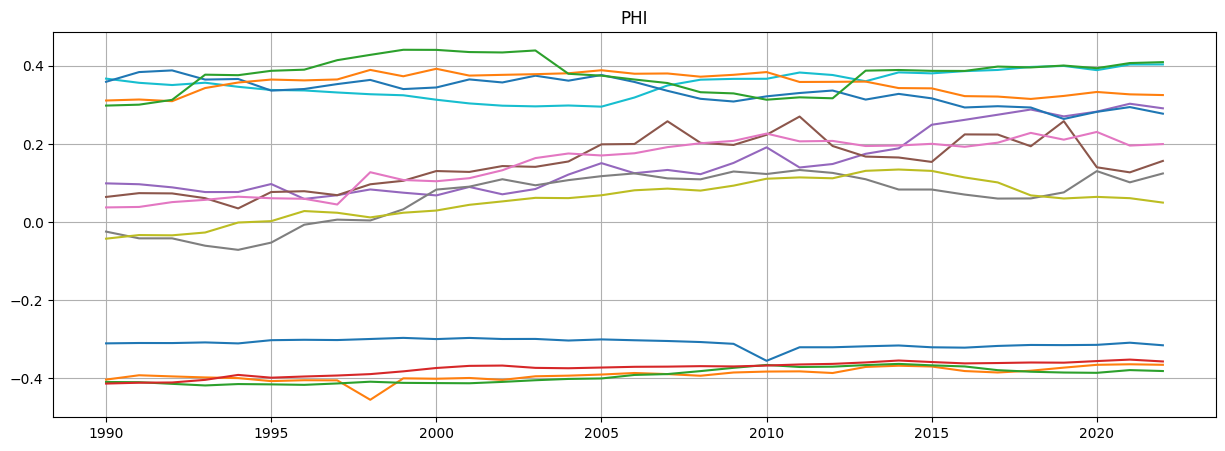

In [ ]:
# Create one plot with all the groups group0, group1, group2
groups_phi = pd.concat([group0_phi, group1_phi, group2_phi])

# plot groups_phi

plot_PHI(groups_phi.drop(columns=["iso3", "group"]).values, groups_phi["iso3"].values, labels=False)


In [ ]:
groups_phi = groups_phi.drop(columns=["group"])
groups_phi = groups_phi.set_index("iso3")
groups_phi

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
iso3,,,,,,,,,,,,,,,,,,,,,
HTI,-0.310385,-0.309442,-0.309604,-0.307940,-0.310502,-0.302244,-0.301203,-0.301898,-0.299174,-0.296348,...,-0.317854,-0.315781,-0.320422,-0.321350,-0.316951,-0.314460,-0.314869,-0.314204,-0.308686,-0.315284
PAK,-0.403077,-0.392019,-0.394960,-0.397577,-0.399323,-0.407010,-0.404707,-0.405061,-0.454775,-0.399893,...,-0.370728,-0.367629,-0.369639,-0.381255,-0.384923,-0.380376,-0.372493,-0.365305,-0.363894,-0.365265
BDI,-0.409239,-0.409744,-0.413984,-0.418098,-0.414542,-0.415335,-0.416564,-0.413000,-0.408516,-0.411479,...,-0.365946,-0.362923,-0.366618,-0.369484,-0.378976,-0.382973,-0.385019,-0.385796,-0.378804,-0.381217
SDN,-0.413292,-0.411091,-0.410520,-0.403782,-0.391123,-0.398223,-0.395185,-0.392679,-0.389071,-0.381988,...,-0.359192,-0.354269,-0.358164,-0.361634,-0.360729,-0.359369,-0.359821,-0.355701,-0.351923,-0.356703
MLT,0.099163,0.096929,0.088941,0.076921,0.077024,0.097482,0.059370,0.068811,0.083581,0.075295,...,0.174827,0.188847,0.249166,0.261777,0.274862,0.288159,0.270594,0.282752,0.303024,0.291239
SGP,0.064421,0.074142,0.073440,0.061271,0.035083,0.077027,0.079077,0.068928,0.096823,0.105778,...,0.167728,0.165374,0.154044,0.224462,0.224099,0.194166,0.258354,0.140323,0.127352,0.156605
IRL,0.037579,0.038799,0.051194,0.056973,0.065006,0.061054,0.059728,0.045065,0.127689,0.107742,...,0.194758,0.196019,0.200390,0.192811,0.203309,0.228376,0.211023,0.230834,0.195885,0.199763
EST,-0.024339,-0.041575,-0.041573,-0.060434,-0.071002,-0.052473,-0.006682,0.006329,0.004187,0.032789,...,0.109717,0.083407,0.083381,0.070469,0.060248,0.060585,0.076110,0.130552,0.101794,0.124519
CZE,-0.042406,-0.033159,-0.033831,-0.026596,-0.001080,0.002482,0.028287,0.023938,0.012032,0.024001,...,0.131249,0.134619,0.131082,0.114289,0.101546,0.068399,0.060523,0.064558,0.061255,0.049905


# 3. Try clustering (aled)

In [75]:
def euclid_distance(series1, series2):
    """ 
    Compute the euclidean distance between two time series
    """
    return np.linalg.norm(series1 - series2)

def manhattan_distance(series1, series2):
    """ 
    Compute the manhattan distance between two time series
    """
    return np.sum(np.abs(series1 - series2))


def dinamic_time_warping(series1, series2):
    from fastdtw import fastdtw
    """
    Compute the dynamic time warping distance between two time series
    """
    return fastdtw(series1, series2)[0]

In [ ]:
def kMeans(series, k, max_it=1000, metrics='ed'):
    """ 
    kMeans clustering algorithm
    - series is a dataframe with the time series that we want to cluster
    - k is the number of clusters we want to create
    """ 

    # Select k random centroids
    centroids = series.sample(n=k) 

    # Create a dictionary to store the clusters
    clusters = {i: [] for i in range(k)}

    # Create a dictionary to store the previous clusters
    old_clusters = {i: [] for i in range(k)}

    # Create a dictionary to store the distances between the centroids and the time series
    distances = {i: [] for i in range(k)}

    # Initialize the assignment of the time series to the clusters
    assignment = np.zeros(series.shape[0])

    for it in tqdm(range(max_it)):
        # Update the assignment of the time series to the clusters
        for i in range(series.shape[0]):
            distances = [euclid_distance(series.iloc[i], centroids.iloc[j]) for j in range(k)]
            assignment[i] = np.argmin(distances)

        # Update the centroids
        for i in range(k):
            centroids.iloc[i] = series[assignment == i].mean()

        # Update the clusters
        for i in range(k):
            clusters[i] = series[assignment == i]

        # Update the old clusters
        for i in range(k):
            old_clusters[i] = series[assignment == i]

        # Update the assignment of the time series to the clusters
        for i in range(series.shape[0]):
            distances = [euclid_distance(series.iloc[i], centroids.iloc[j]) for j in range(k)]
            assignment[i] = np.argmin(distances)

    
    return clusters


k = 3
# Apply the kMeans algorithm to the groups_phi dataframe
results = kMeans(groups_phi, k, max_it=1000)



  0%|          | 0/1000 [00:00<?, ?it/s]

100%|██████████| 1000/1000 [00:08<00:00, 114.23it/s]


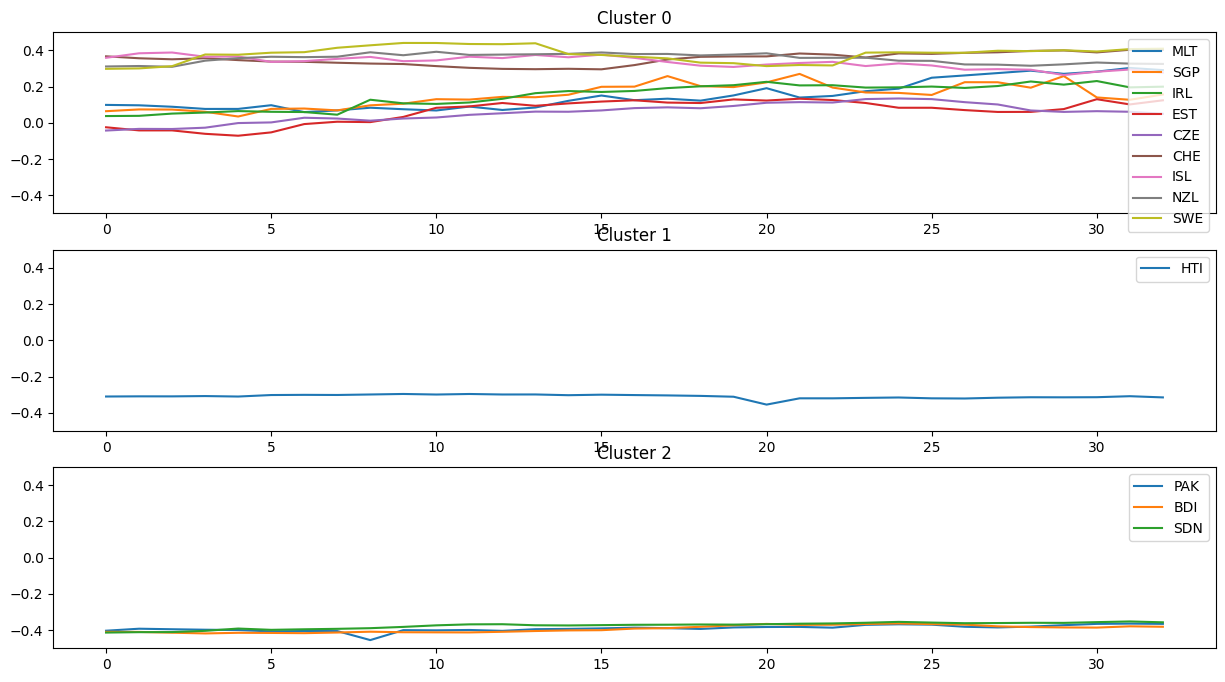

In [88]:
# Plot the results
fig, axs = plt.subplots(k, 1, figsize=(15, 8))
for i in range(k):
    group = results[i]
    names = group.index
    group = group
    axs[i].set_ylim(-0.5, 0.5)
    axs[i].plot(group.T)
    axs[i].set_title(f'Cluster {i}')
    axs[i].legend(names)
plt.show()

In [80]:
results_phi = kMeans(phi_df, k, max_it=1000)

100%|██████████| 1000/1000 [04:42<00:00,  3.53it/s]


NameError: name 'plot_clusters' is not defined

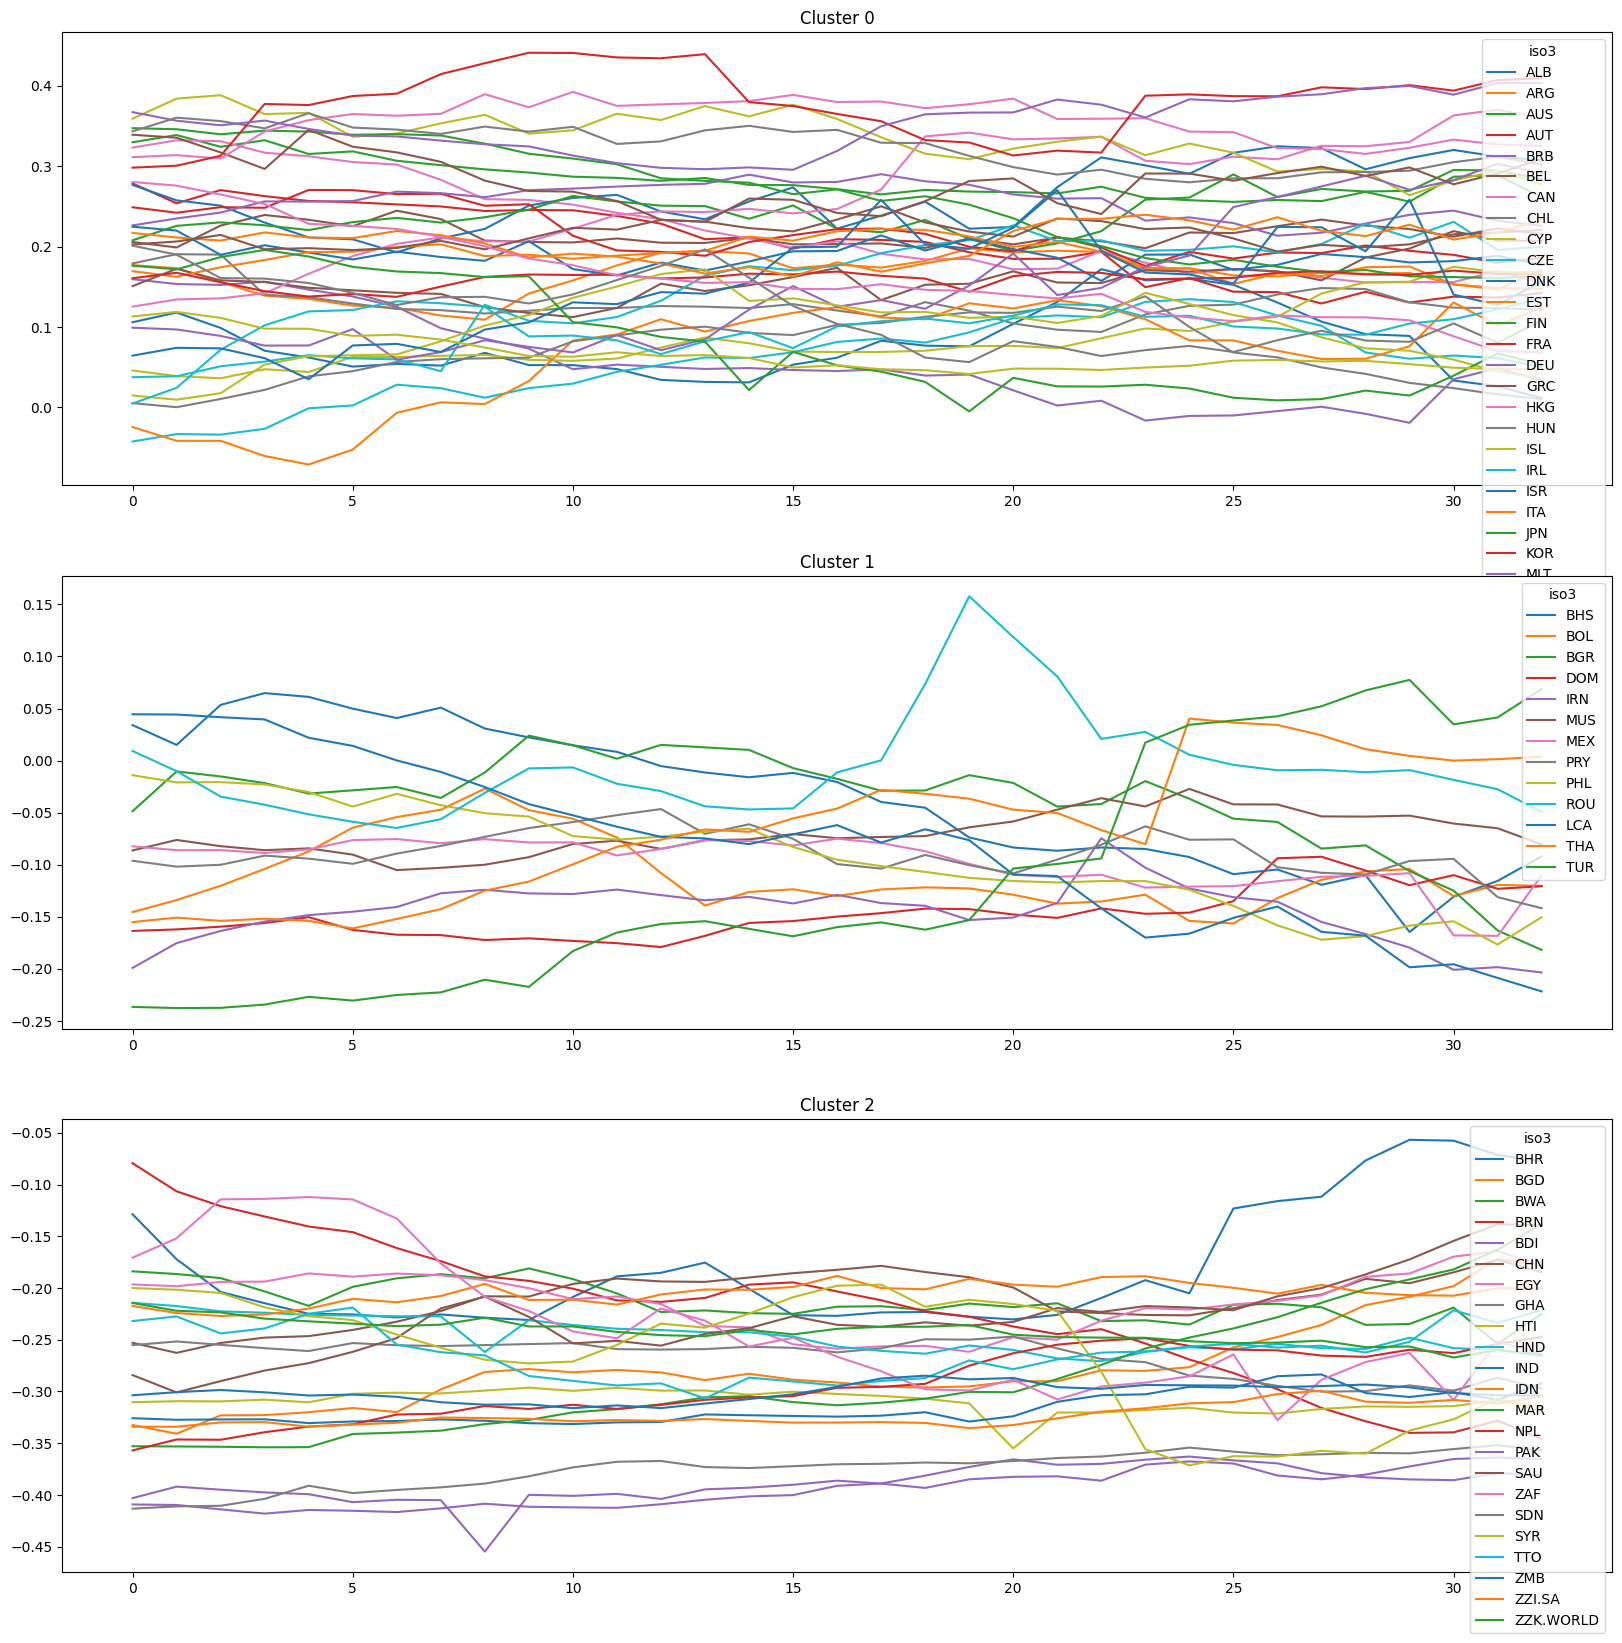

In [86]:
def plot_clusters(k, results, legends=True):
    fig, axs = plt.subplots(k, 1, figsize=(20, 20))
    for i in range(k):
        names = results[i].index
        results[i].T.plot(ax=axs[i])
        axs[i].set_title(f'Cluster {i}')
        if legends:
            axs[i].legend(names)
    plt.show()

plot_clusters(k, results_phi, legends=False)